In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Insurance claims data.csv')
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [5]:
data['claim_status'].unique()

array([0, 1], dtype=int64)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [10]:
import numpy as np

# Group columns by dtype
dtype_groups = data.dtypes.groupby(data.dtypes).groups

# Extract only int, float, object
{
    'int64': dtype_groups.get(np.dtype('int64'), []),
    'float64': dtype_groups.get(np.dtype('float64'), []),
    'object': dtype_groups.get(np.dtype('O'), [])  # 'O' is for object
}

{'int64': Index(['customer_age', 'region_density', 'airbags', 'displacement', 'cylinder',
        'length', 'width', 'gross_weight', 'ncap_rating', 'claim_status'],
       dtype='object'),
 'float64': Index(['subscription_length', 'vehicle_age', 'turning_radius'], dtype='object'),
 'object': Index(['policy_id', 'region_code', 'segment', 'model', 'fuel_type',
        'max_torque', 'max_power', 'engine_type', 'is_esc',
        'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
        'is_parking_camera', 'rear_brakes_type', 'transmission_type',
        'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
        'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
        'is_power_door_locks', 'is_central_locking', 'is_power_steering',
        'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
        'is_ecw', 'is_speed_alert'],
       dtype='object')}

## The dataset contains 58,592 entries and 41 columns, including the target variable claim_status. It is based on the problem of insurance claim frequency prediction. Here’s a brief overview of some of the features:
policy_id: Unique identifier for the insurance policy
subscription_length, vehicle_age, customer_age: Numeric attributes related to the policy, vehicle, and customer
region_code, segment, model, fuel_type: Categorical attributes representing the region, vehicle segment, model, and fuel type
max_torque, max_power, engine_type: Specifications of the vehicle’s engine
airbags, is_esc, is_adjustable_steering: Features related to the vehicle’s safety and convenience
claim_status: Target variable indicating whether a claim was made (1) or not (0)not (0)

# EDA

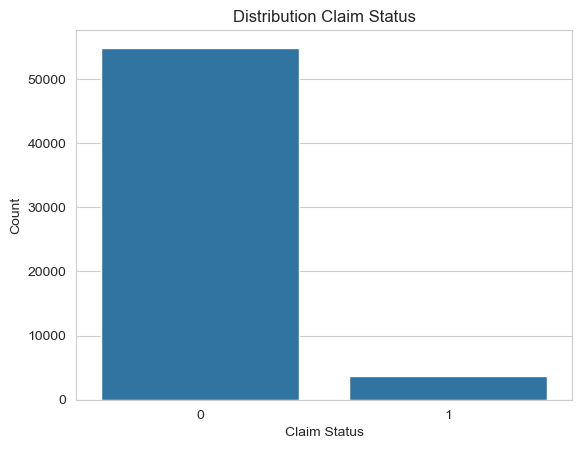

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

sns.countplot(x='claim_status', data=data)
plt.title('Distribution Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

### Significant imbalance between the classes:
    fewer claims (1) compared to 
    no claims    (0). 

### Now we analyzing both Numerical and Categorical features


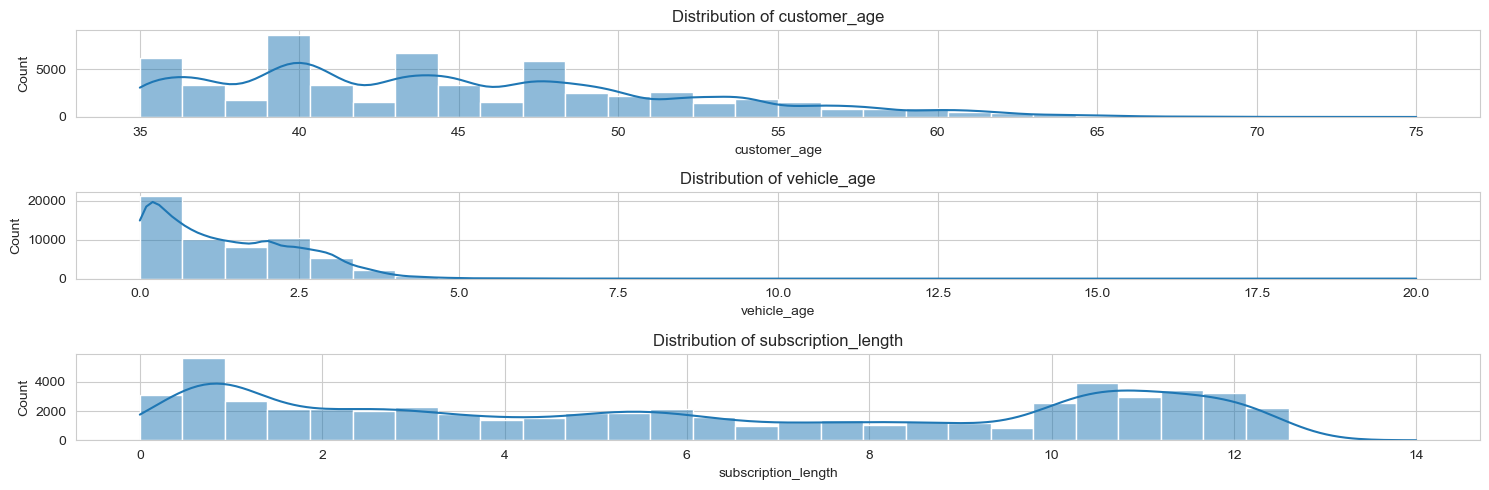

"\nenumerate(numerical_columns, 1) assigns:\n        i = 1 → col = 'customer_age'\n        i = 2 → col = 'vehicle_age'\n        i = 3 → col = 'subscription_length'\n\n\n"

In [6]:
# numerical columns Analysis

#list contain 3 numerical columns
numerical_columns = [ 'customer_age', 'vehicle_age','subscription_length',]

# dist. of numerical columns
plt.figure(figsize=(15, 5)) # create figure (width,height)

for i, col in enumerate(numerical_columns,1): # loop through each numerical columns 
    plt.subplot(3,1, i) # Creates subplot(3rows, 1 column) 
    sns.histplot(data[col],bins=30,kde=True) # plot histogram(30 bins,probaility cureve) 
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

'''
enumerate(numerical_columns, 1) assigns:
        i = 1 → col = 'customer_age'
        i = 2 → col = 'vehicle_age'
        i = 3 → col = 'subscription_length'


'''



    1. 'customer_age': This shows a fairly normal distribution, with the majority of customers falling within a middle-age range.
    2. 'vehicle_age': This distribution is somewhat uniform but with spikes at specific Vehicle ages
    3. 'subscription_length: Most values are clustered around lower numbers, indicating that many policies have shorter subscription lengths'

## Analyze relevant categorical features to understand their variation and relationship with the claim_status

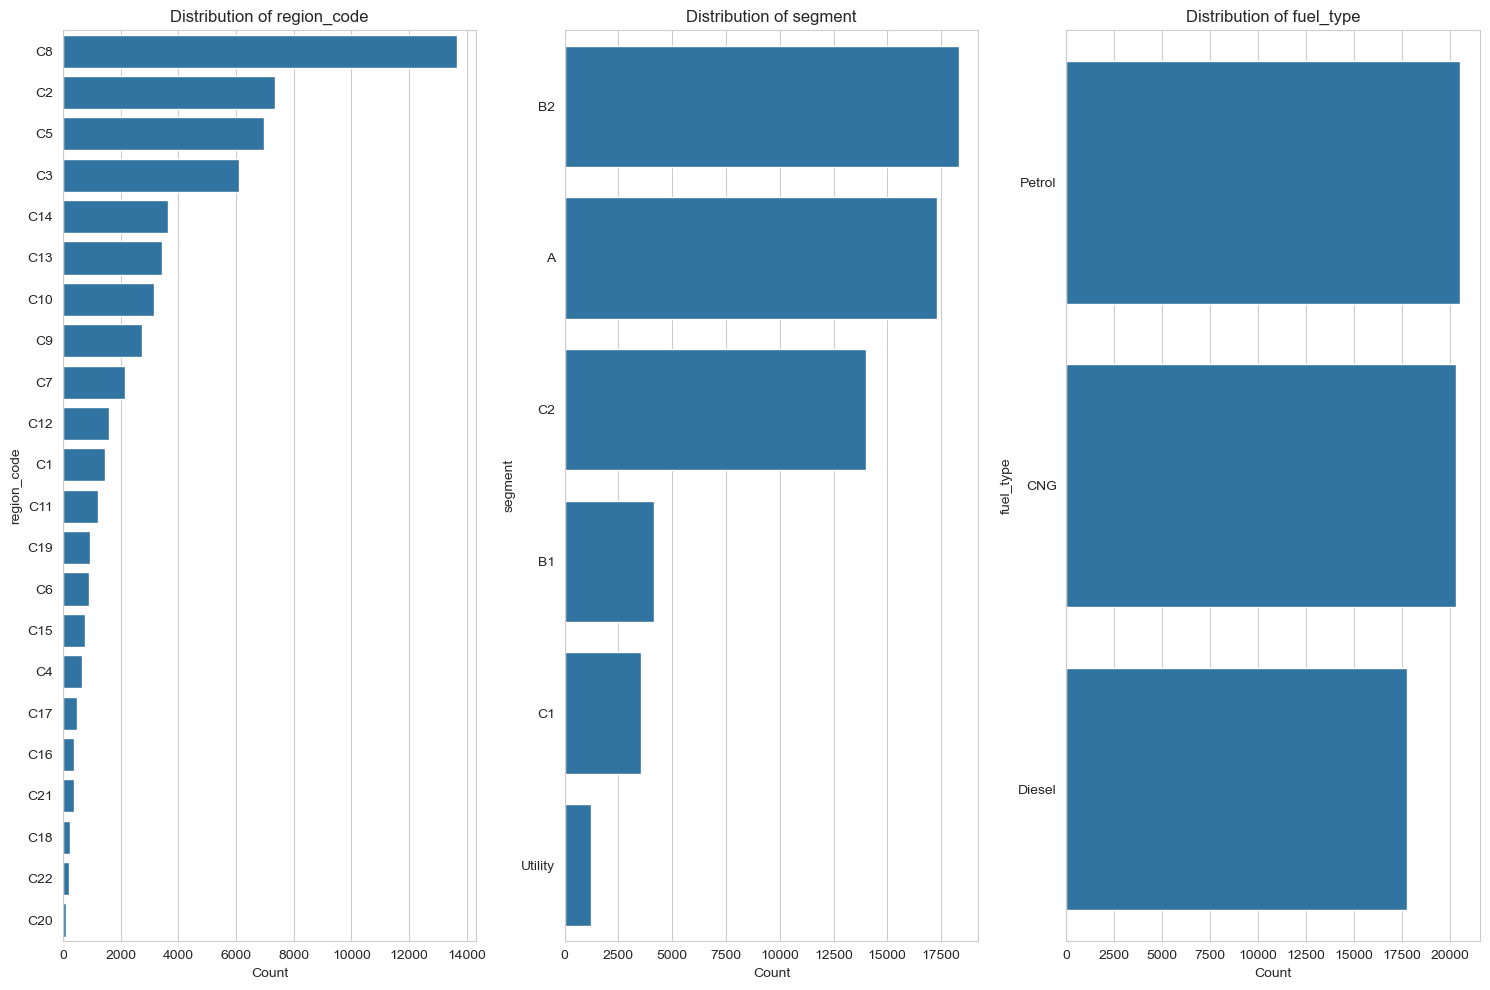

In [11]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1,3, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

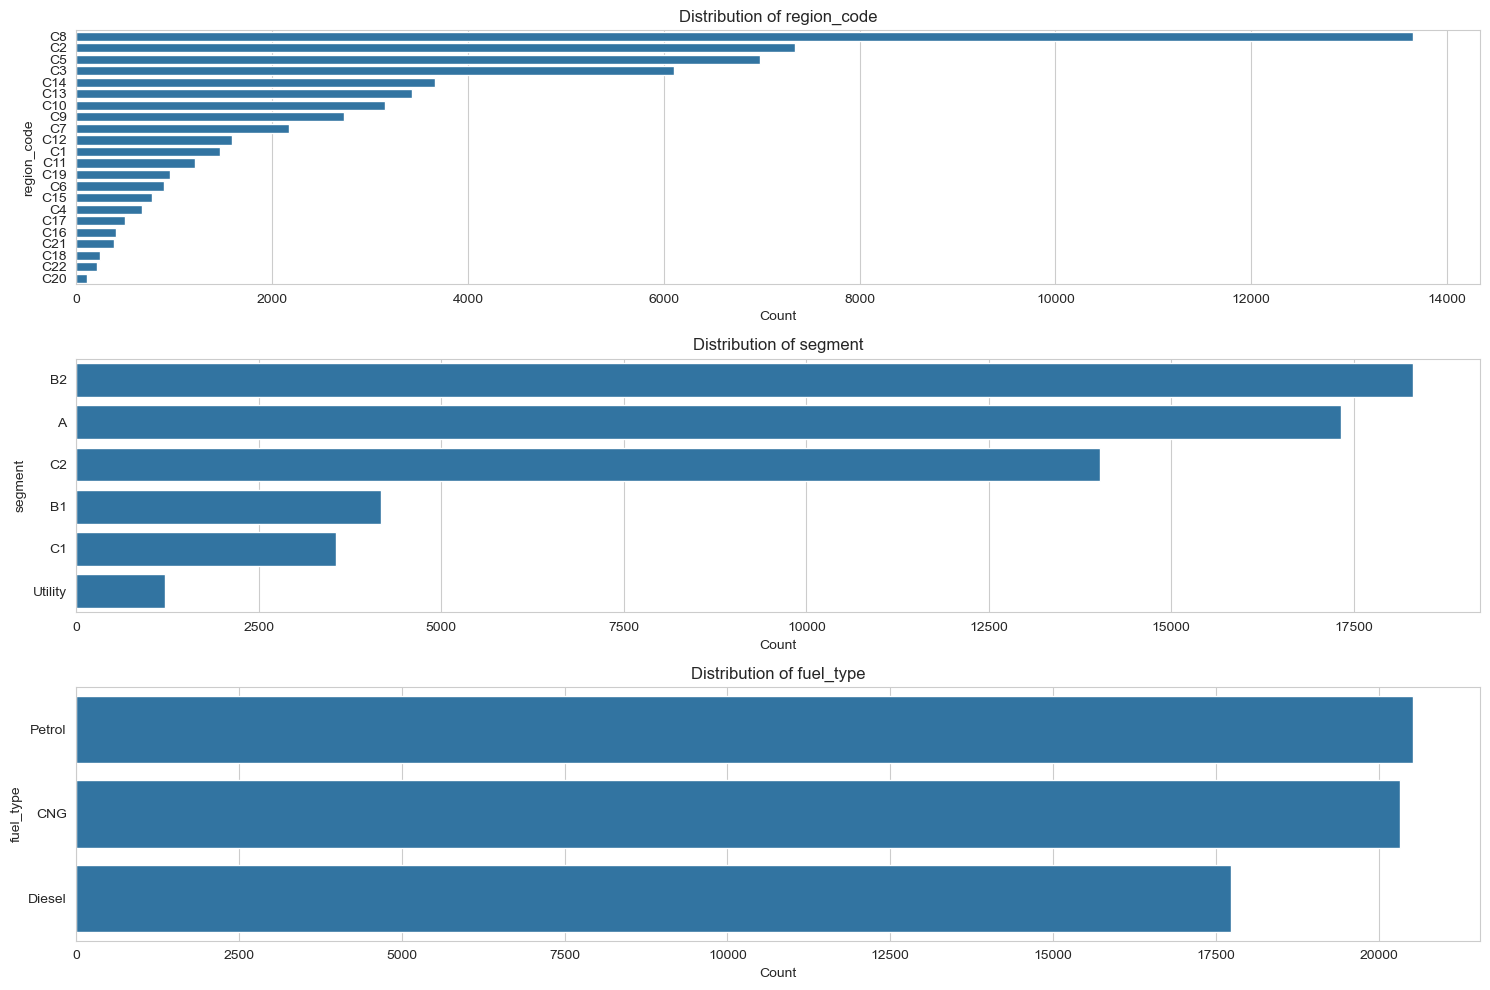

In [20]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code', 'segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3,1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

    ‘region_code,’ there is a wide variety of codes, each with varying counts, but a few specific codes dominate with much higher counts than others. 
    
    In the ‘segment’ distribution, there are fewer categories, with the ‘B2’ segment being the most common, followed by ‘A’ and ‘C2,’ and the ‘Utility’ segment being the least common. 
    
    Lastly, ‘fuel_type’ shows three categories: ‘Petrol’ has the highest count than CNG and Diesel.

## Handling Class Imbalance


In [12]:
from sklearn.utils import resample

# separate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]


majority # result (54844 rows × 41 columns)
minority # result (3748 rows × 41 columns)

#  Difference = (51096 rows × 41 columns)


,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
12,POL050280,10.2,1.6,41,C2,27003,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
29,POL021346,10.9,2.0,41,C10,73430,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
76,POL044165,12.2,0.4,41,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,1
81,POL012008,11.1,1.0,57,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
84,POL043686,1.1,0.0,53,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58475,POL052302,0.4,1.4,36,C9,17804,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
58517,POL053069,0.9,1.8,37,C2,27003,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,1
58524,POL039299,2.2,0.6,37,C11,6108,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
58543,POL014364,11.7,1.2,51,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1


In [13]:
# oversample the minority class
from sklearn.utils import resample

minority_oversampled = resample(minority, # minority class dataFrame
                              replace=True, # allow resampling(same data can be picked mulitple times)
                              n_samples=len(majority), # matches the size of majority class dataframe
                              random_state=42) # ensure repoducibility(consistent value)
  
minority_oversampled # Result (54844 rows × 41 columns) = majoirity class size

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
49350,POL055973,10.3,0.8,52,C8,8794,Utility,M10,CNG,85Nm@3000rpm,...,No,No,No,No,No,No,No,Yes,0,1
54396,POL044201,12.4,1.6,48,C3,4076,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
13313,POL052139,10.2,2.0,50,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1
19865,POL057684,10.4,1.4,41,C13,5410,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
17144,POL041866,1.4,0.4,41,C11,6108,B2,M7,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,POL044783,11.6,0.2,54,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
36093,POL044451,11.3,1.0,61,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
54154,POL040484,7.7,0.0,49,C11,6108,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
48891,POL040274,11.2,1.0,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1


In [15]:
# combine majority class with oversampled minority class

oversampled_data = pd.concat([majority, minority_oversampled])
oversampled_data # Result: (109688 rows × 41 columns)



,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,POL044783,11.6,0.2,54,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,2,1
36093,POL044451,11.3,1.0,61,C5,34738,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,1
54154,POL040484,7.7,0.0,49,C11,6108,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,1
48891,POL040274,11.2,1.0,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,1


In [16]:
# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()
oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

## After performing oversampling on the minority class, both classes are balanced with 54,844 entries each. 

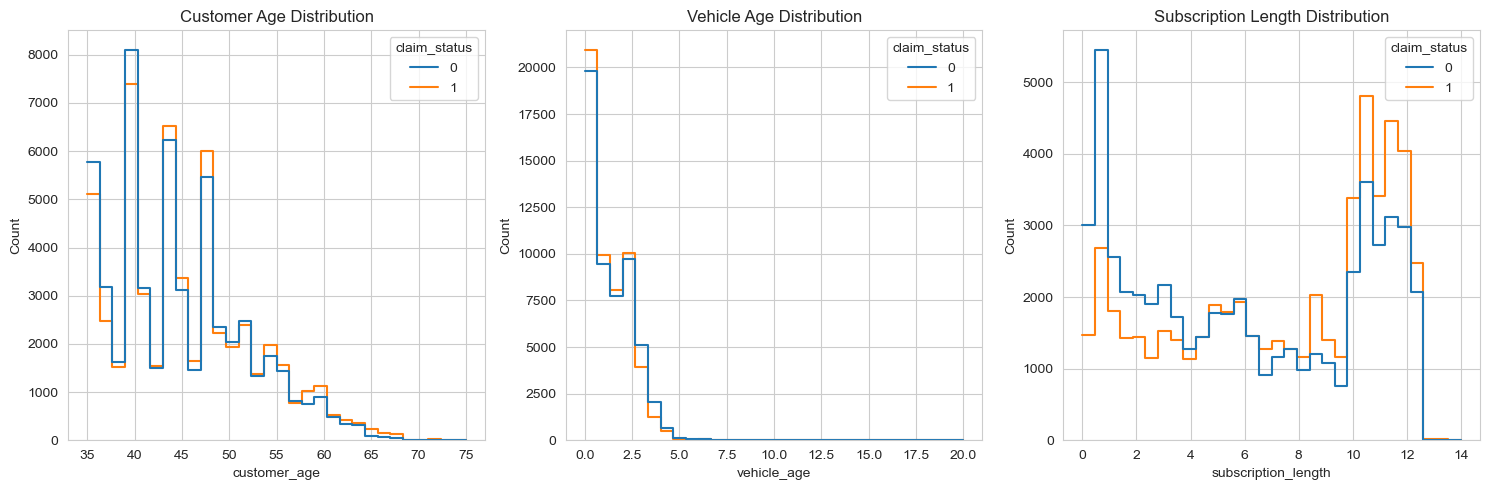

In [17]:
# selecting some relevant categorical columns for analysis
columns = ['customer_age', 'vehicle_age', 'subscription_length']

## plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15, 5))

for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.histplot(data=oversampled_data.copy(), x=col, hue='claim_status', element='step', bins=30, fill=False)
    plt.title(f'{col.replace("_", " ").title()} Distribution')

plt.tight_layout()
plt.show()


## Feature Selection
Now we analyze both Categoricacl and Numerical Features to determine impact on the target variable.


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# encode categorical variables
le = LabelEncoder() # assign unique numerical values(0,1,2...) to each category 
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
# applies encoding only to categorical columns. 


# separate features and target variable
X = encoded_data.drop('claim_status', axis=1) # drop target varaible
y = encoded_data['claim_status']

# create & Training Random forest classifier model
rf_model = RandomForestClassifier(random_state=42) # 42 for reproducebility
rf_model.fit(X, y)

# get feature importance to 
feature_importance = rf_model.feature_importances_

# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))  # displaying the top 10 important features

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


policy_id is the most important feature, meaning it has the highest impact on claim predictions.

Features like length, engine_type have very low importance, meaning they may not be useful.


## Model Training
Predictive model using the oversampled data:

    Binary Classification, a suitable algorithm could be logistic regression, random forest, or gradient boosting. Considering the effectiveness of random forests in handling both numerical and categorical data and their ability to model complex interactions

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# drop 'Policy_id' column from the data
oversampled_data = oversampled_data.drop('policy_id', axis=1)

KeyError: "['policy_id'] not found in axis"

In [22]:
# prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']


In [23]:
# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)


In [24]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)


In [25]:

# create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [59]:

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



### Report provide various metrics, Here's an interpretation:
    class 0 (no claim), precision is 1.00, meaning that when the model predicts no claim, it is correct 100% of the time. 
    class 1 (claim), precision is 0.98, indicating that when the model predicts a claim, it is correct 98% of the time.
    class 0, recall is 0.96, signifying that the model correctly identifies 98% of all actual no-claim instances. 
    class 1, recall is 1.00, showing that the model correctly identifies 100% of all actual claim instances

    F1-score for both classes is 0.98, indicating a high balance between precision and recall. It means the model is both accurate and reliable in its predictions across both classes

    overall accuracy of the model is 98%, which means that it correctly predicts the claim status for 98% of the cases in the test dataset

    macro average for precision, recall and F1-score is 0.98, reflecting the average performance of the model across both classes without considering the imbalance in class distribution. High value suggests that the model performs well across both classes

    weighted average for precision, recall, and F1-score is also 0.98, taking into account the imbalance in class distribution. It indicates that, on average, the model performs consistently well across the different classes 
    

    

### Label the original imbalanced data using our model to see how many instances are correctly classified from our model:

In [26]:
original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


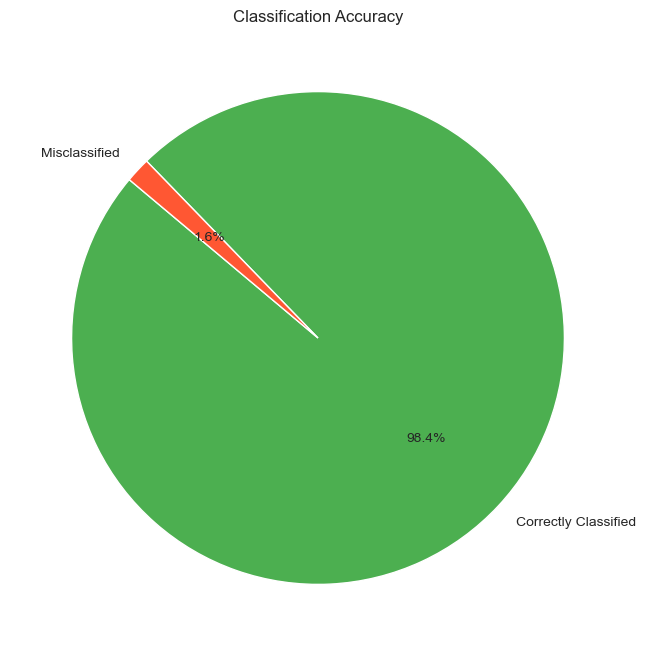

In [27]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy')
plt.show()

### Result: 
Model performs well on the original imbalanced data as well

### Summary
So, this is how to handle class imbalance and perform classification on imbalanced data. Imbalanced data refers to a situation in classification problems where the number of observations in each class significantly differs. In such datasets, one class (the majority class) vastly outnumbers the other class (the minority class). This imbalance can lead to biased models that favour the majority class, resulting in poor predictive performance on the minority class, which is often the class of greater interest.

